In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Feel free to import whatver python libraries you would like

In [38]:
eps_info = pd.read_pickle('eps_data.pkl')
ret_data = pd.read_pickle('return_data.pkl')
toy_returns = pd.read_pickle('toy_returns.pkl')
eps_info

signal                                sector  \
datadate   companyId                           
2020-01-31 168154                Industrials   
           168569                Industrials   
           247170                Industrials   
           127916     Information Technology   
           296957                  Utilities   
...                                      ...   
2021-10-29 275004592  Information Technology   
           662294213             Health Care   
           277863826             Industrials   
           127912549  Consumer Discretionary   
           303022599             Health Care   

signal                                                         group  \
datadate   companyId                                                   
2020-01-31 168154                                      Capital Goods   
           168569                                     Transportation   
           247170                 Commercial & Professional Services   
           127916                    Technology Hardware & Equipment   
           296957                                          Utilities   
...                                                              ...   
2021-10-29 275004592                             Software & Services   
           662294213  Pharmaceuticals, Biotechnology & Life Sciences   
           277863826                                   Capital Goods   
           127912549                                       Retailing   
           303022599  Pharmaceuticals, Biotechnology & Life Sciences   

signal                    marketcap  fwd_eps_median  fwd_eps_numobs  \
datadate   companyId                                                  
2020-01-31 168154       1463.970316        2.822236        4.517648   
           168569      11757.475941        5.125000       20.000000   
           247170        266.803646        0.600000        5.000000   
           127916       3427.693425        0.900000        1.000000   
           296957      10981.413396        4.850000       14.000000   
...                             ...             ...             ...   
2021-10-29 275004592  106470.456000       -0.192235       26.505884   
           662294213     139.185141       -2.270235        3.000000   
           277863826    1448.256243        1.330194        6.000000   
           127912549    3202.800000       -0.220059        3.976471   
           303022599    3062.755496             NaN             NaN   

signal                price_adjusted  
datadate   companyId                  
2020-01-31 168154              42.58  
           168569              26.84  
           247170               7.60  
           127916              20.27  
           296957              97.69  
...                              ...  
2021-10-29 275004592          353.84  
           662294213            6.75  
           277863826           32.97  
           127912549            5.10  
           303022599            7.83  

[76745 rows x 6 columns]

In [3]:
ret_data.head()

return
datadate   companyId datadate_fwd          
2020-01-31 18671     2020-02-28    0.019557
           18711     2020-02-28   -0.107559
           18749     2020-02-28   -0.062214
           18833     2020-02-28   -0.102804
           19033     2020-02-28   -0.112457

In [4]:
toy_returns.head()

,0,1,2
0,-0.011504,0.000379,0.000260
1,0.003527,-0.000371,0.000175
2,0.005507,0.000950,0.000080
3,-0.009747,-0.000543,0.000039
4,0.005528,-0.000965,0.000083


# A. Price to Forward EPS Calculations
#### - fwd_eps_median: The median analyst estimate for forward EPS 
#### - fwd_eps_numobs: The number of analyst estimates for forward EPS
#### - price_adjusted: The price per share of the stock

## 1. i. What is the aggregate Price to Fwd EPS of the Top 500 and Top 3000 by marketcap companies for 2021-10-29? 

### Up to your judgment on how to aggregate, write a comment explaining why you chose to aggregate the way you did

In [5]:
eps_info = eps_info.reset_index()
eps_info['datadate'] = pd.to_datetime(eps_info['datadate'])

date_filter = eps_info['datadate'] == '2021-10-29'
eps_info_date = eps_info[date_filter]
eps_info_date = eps_info_date[eps_info_date['fwd_eps_median']>0]

eps_info_date['pe_ratio'] = eps_info_date['price_adjusted'] / eps_info_date['fwd_eps_median'].replace(0, float('nan'))

eps_info_sorted = eps_info_date.sort_values(by='marketcap', ascending=False)

top_500 = eps_info_sorted.head(500)
top_3000 = eps_info_sorted.head(3000)

top_500_pe = top_500['pe_ratio'].mean()
top_3000_pe = top_3000['pe_ratio'].mean()

print(f"Mean P/E Ratio for Top 500 companies on 2021-10-29: {top_500_pe}")
print(f"Mean P/E Ratio for Top 3000 companies on 2021-10-29: {top_3000_pe}")

#i used the mean p/e ratio to gauge the overall market sentiment and valuation at a glance and to make them easily comparable. sorting by market cap allowed me to get the top 500 and 3000 companies and grouping by sectors helped acccount for different sectors experiencing different growth rates and profitability, as represented by their p/e ratios. filtering out negative median forcased eps values made it easier to interpret and avoided misleading reflection of the true valuations.

Mean P/E Ratio for Top 500 companies on 2021-10-29: 41.17158595229048
Mean P/E Ratio for Top 3000 companies on 2021-10-29: 38.811780821113246


## 2. How and why does your answer to A1 change if you filter by including only those fwd_eps_median numbers with more analysts estimating (ie, filtering on fwd_eps_numobs. So seeing how things change within the top 500/3000 by marketcap if you then exclude those companies with fwd_eps_numobs < N )?

### It is up to you to pick the different values of N necessary to answer the question according to your judgment 

In [6]:
N_values = [3, 8, 13]

for N in N_values:
    eps_filtered = eps_info_sorted[eps_info_sorted['fwd_eps_numobs'] >= N]

    top_500 = eps_filtered.head(500)
    top_3000 = eps_filtered.head(3000)

    top_500_pe = top_500['pe_ratio'].mean()
    top_3000_pe = top_3000['pe_ratio'].mean()

    print(f"mean p/e ratio for top 500 companies with >= {N} analyst estimates: {top_500_pe}")
    print(f"mean p/e ratio for top 3000 companies with >= {N} analyst estimates: {top_3000_pe}")

#i chose 13 as the highest N value because 13 and above is the highest you can go where there are still 500 companies within the data group to properly calculate the top 500 companies. otherwise the values for top 500 and 3000 will be the same.

#increasing analyst coverage stabalizes the p/e ratios, implying that companies with more analyst coverage tend to have more stable or consistent valuation metrics, likely due to less variance in earnings estimates among a larger group of analysts. 

#the decrease in trend for the the top 500 companies could indicate that the initially higher p/e ratio was driven by companies with fewer analyst estimates, which might have had more optimistic earnings projections. i would go with the estimates of the larger set of analysts as to avoid any skewing from a smaller sample of opinions.

#the consistency displayed for the top 3000, despite the increased amount of analyst estimates suggests a high quality/well-rounded valuation when it comes to the larger set of companies. I would keep my estimate the same.

mean p/e ratio for top 500 companies with >= 3 analyst estimates: 40.442995957678455
mean p/e ratio for top 3000 companies with >= 3 analyst estimates: 39.48640381697161
mean p/e ratio for top 500 companies with >= 8 analyst estimates: 36.904787390129506
mean p/e ratio for top 3000 companies with >= 8 analyst estimates: 39.10621964437985
mean p/e ratio for top 500 companies with >= 13 analyst estimates: 39.607279641137815
mean p/e ratio for top 3000 companies with >= 13 analyst estimates: 39.88572410456044


## 3. Which Sector generally (over time) is the most expensive (justify your answer) for the dates given (only include EPS with at least 3 analyst estimates, Top 1000 by marketcap for each date) ? 

### It may be helpful to visualize the trend over time with a graph.

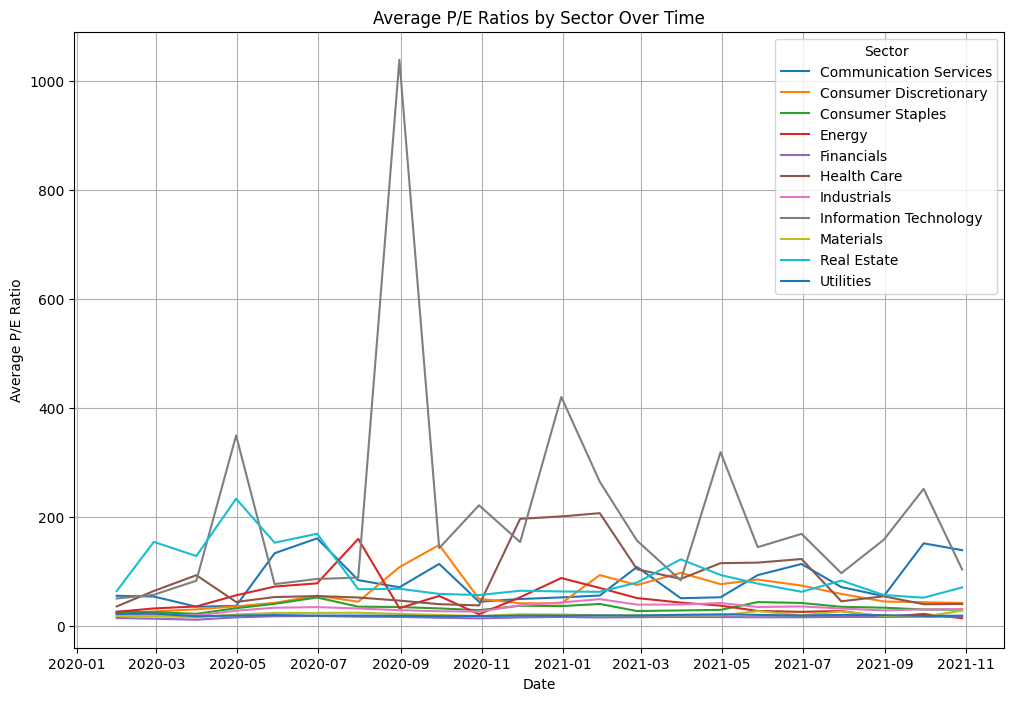

In [7]:
eps_filtered = eps_info[(eps_info['fwd_eps_numobs'] >= 3) & (eps_info['fwd_eps_median'] > 0)]
sorted_eps = eps_filtered.sort_values(by=['datadate', 'marketcap'], ascending=[True, False])
top_1000_per_date = sorted_eps.groupby('datadate').head(1000)
top_1000_per_date['pe_ratio'] = top_1000_per_date['price_adjusted'] / top_1000_per_date['fwd_eps_median']

sector_pe_over_time = top_1000_per_date.pivot_table(
    values='pe_ratio',
    index='datadate',
    columns='sector',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
for sector in sector_pe_over_time.columns:
    plt.plot(sector_pe_over_time.index, sector_pe_over_time[sector], label=sector)

plt.title('Average P/E Ratios by Sector Over Time')
plt.xlabel('Date')
plt.ylabel('Average P/E Ratio')
plt.legend(title='Sector')
plt.grid(True)
plt.show()


## 4. If I bought stocks that were in the top 20% of FWD EPS to Price each month (ie the cheapest), and shorted those in the bottom 20% each month (ie the most expensive), what would my return have been each month? (you can show a dataframe) 

### Only include companies in the Top 500 each month by marketcap, with at least 3 analyst estimates for forward EPS
### Use the returns_data.pkl file for returns, assume equal position sizes in all longs and shorts, instantaneous rebalancing

In [30]:
eps_data = pd.read_pickle('eps_data.pkl')
returns_data = pd.read_pickle('return_data.pkl')

eps_data = eps_data.reset_index()
returns_data = returns_data.reset_index()

eps_data['datadate'] = pd.to_datetime(eps_data['datadate'])
returns_data['datadate'] = pd.to_datetime(returns_data['datadate'])


data = pd.merge(eps_data, returns_data, on=['datadate', 'companyId'])


data = data[data['fwd_eps_numobs'] >= 3]
data['marketcap_rank'] = data.groupby('datadate')['marketcap'].rank(ascending=False, method='first')
data = data[data['marketcap_rank'] <= 500]

data['eps_to_price_ratio'] = data['fwd_eps_median'] / data['price_adjusted']

data = data.sort_values(by=['datadate', 'eps_to_price_ratio'])

def select_stocks(group):
    top_20 = int(len(group) * 0.2)
    group['position'] = 'neutral'  # Default to neutral
    group.iloc[:top_20, group.columns.get_loc('position')] = 'short'
    group.iloc[-top_20:, group.columns.get_loc('position')] = 'long'
    return group

data = data.groupby('datadate').apply(select_stocks)


if 'datadate' in data.index.names:
    
    if 'datadate' in data.columns:
        data.reset_index(drop=True, inplace=True)
    else:
        data.reset_index(inplace=True)


def calculate_returns(group):
    long_returns = group[group['position'] == 'long']['return'].mean()
    short_returns = group[group['position'] == 'short']['return'].mean()
    return long_returns - short_returns

monthly_returns = data.groupby('datadate').apply(calculate_returns)

monthly_returns


datadate
2020-01-31   -0.062401
2020-02-28   -0.103047
2020-03-31   -0.044247
2020-04-30   -0.065683
2020-05-29   -0.049069
2020-06-30   -0.027569
2020-07-31   -0.018665
2020-08-31   -0.008402
2020-09-30   -0.000854
2020-10-30   -0.007575
2020-11-30   -0.022115
2020-12-31    0.016698
2021-01-29    0.017617
2021-02-26    0.131905
2021-03-31    0.009185
2021-04-30    0.049581
2021-05-28   -0.082804
2021-06-30    0.006235
2021-07-30    0.005642
2021-08-31    0.022371
2021-09-30   -0.031423
dtype: float64

# B. Toy Returns
#### Imagine the 3 columns of the toy_returns dataframe each represent the returns from investing in some asset class
## 1. Which of the 3 return streams would you want to be invested in, and why?

In [34]:
mean_returns = toy_returns.mean()
std_devs = toy_returns.std()

risk_free_rate = 0
sharpe_ratios = (mean_returns - risk_free_rate) / std_devs

print("mean returns:\n", mean_returns)

print("standard deviations:\n", std_devs)

print("sharpe ratios:\n", sharpe_ratios)


#2 is the best choice because its sharpe ratio is extremely high, suggesting that it offers the highest returns per unit of risk. this makes it a good fit for both risk-averse and risk-tolerant investors seeking efficient returns.

mean returns:
 0    0.000171
1    0.000078
2    0.000101
dtype: float64
standard deviations:
 0    0.009946
1    0.001001
2    0.000101
dtype: float64
sharpe ratios:
 0    0.017198
1    0.078318
2    0.999239
dtype: float64


## 2. Using your approach from the above, which companyId would you want to be invested in (use the returns_data.pkl file)? 

### Only include those names that are in the Top 2000 by marketcap in the first month of data, and that have returns for each month. As always, justify your answer with evidence

In [39]:
top_companies = data[data['datadate'] == data['datadate'].min()].nlargest(2000, 'marketcap')['companyId'].unique()

filtered_data = data[data['companyId'].isin(top_companies)]

consistent_companies = filtered_data.groupby('companyId').filter(lambda x: x['datadate'].nunique() == data['datadate'].nunique())

mean_returns = consistent_companies.groupby('companyId')['return'].mean()
std_devs = consistent_companies.groupby('companyId')['return'].std()

risk_free_rate = 0.0
sharpe_ratios = (mean_returns - risk_free_rate) / std_devs

print(sharpe_ratios.sort_values(ascending=False))

best_company_id = sharpe_ratios.idxmax()
print(f"best company to invest in is company id: {best_company_id} with a sharpe ratio of: {sharpe_ratios[best_company_id]}")

# company 32307 is the best investment choice because it offers the highest return per unit of risk for the top 2000 companies by marketcap in the given period. the sharpe ratio ensures that the choice compensates for the risks taken balancing the return and volatility.

companyId
32307        0.744140
319404       0.668589
313784       0.632566
253891410    0.614835
4773318      0.611206
               ...   
263295      -0.081517
36235       -0.088387
3632895     -0.106250
285827      -0.112254
100231      -0.205345
Name: return, Length: 384, dtype: float64
best company to invest in is company id: 32307 with a sharpe ratio of: 0.7441400674842998


# C. Design a Cash Register
### Implement the functionality of a basic cash register. There are 4 operations to handle:
#### 1. scan(item, price): scans the given item (an arbitrary string) at the given price (assume all prices are valid ie >= 0). Assume all items have the same price (ie if its a banana it costs 1 dollar)
#### 2. discount(item, percent): discounts all past and future scans of the item by the given percentage. ie discount("banana", .1) applies a 10% discount to all bananas. Assume that any inputed discounts are valid (ie between 0 and 1). Important note - if an item is discounted several times only the last discount should be applied.
#### 3. undo(): reverses the last operation, whether scan or discount. Note that undo() can be called multiple times in a row. For example, if called twice in a row it shuld undo the last two actions performed (as opposed to undoing the undo). 
#### 4. checkout(): Should output the final receipt as a string and reset the cash register. Checkout will never be called on an empty cart. Any future operations start with an empty register, and any undo() operations can only affect operations post-checkout. The expected output format is a string as follows:

##### item1, quantity, total amount spent
##### item2, quantity, total amount spent
#### note that items should be output in alphabetical order, not order that they were scanned.

#### If someone checks out and then the next person's stuff is scanned, the output should have a newline between the receipts, ie:

##### item1, quantity, total amount spent
##### item n, quantity, total amount spent
##### newline
##### item1, quantity, total amount spent
##### item n, quantity, total amount spent




In [6]:
# Here is some runner code (feel free to modify it or any function call or input arguments)
# input lines are simply things with format "operation,item,price (if scan) or percent (if discount)" or just "undo" 
# which you can infer from the code 

def run_cash_register(input_lines):
    for input_line in input_lines:
        input_parts = [token.strip() for token in input_line.split(',')]
        op = input_parts[0]

        if op == 'scan':
            item = input_parts[1]
            price = float(input_parts[2])
            scan(item, price)
        elif op == 'discount':
            item = input_parts[1]
            percent = float(input_parts[2])
            discount(item, percent)
        elif op == 'undo':
            undo()
        elif op == 'checkout':
            checkout()

        output_str = ''
        return output_str
